# Boston Housing Project

Compiled from Flatiron Data Science Module 2 Labs.

## Data Loading

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# For recursive feature elimination
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Create DataFrame with features (not target var)
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town

LSTAT: % lower status of the population

In [5]:
# Create target DataFrame
boston_target = pd.DataFrame(boston.target, columns = ['MEDV'])
boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# Join feature and target to create full DataFrame
boston_df = pd.concat([boston_target, boston_features], axis=1)
boston_df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## EDA

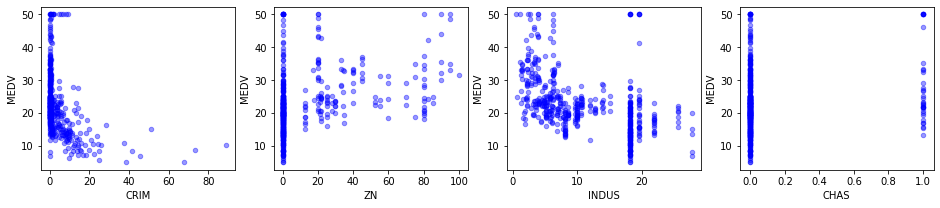

In [8]:
# Scatter plot for first 4 features

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(boston_features)[0:4], axes):
    boston_df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.4, color='b')

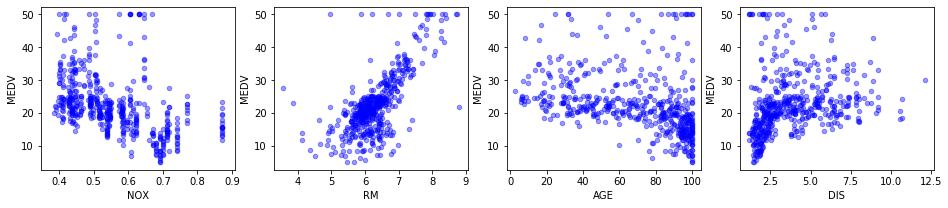

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(boston_features)[4:8], axes):
    boston_df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.4, color='b')

## Categorical Variables

### Create bins

In [10]:
boston_df["RAD"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [11]:
# First, create bins based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]

# Use pd.cut()
bins_rad = pd.cut(boston_df['RAD'], bins)

In [12]:
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_rad = bins_rad.cat.as_ordered()
bins_rad.head()

0    (0, 3]
1    (0, 3]
2    (0, 3]
3    (0, 3]
4    (0, 3]
Name: RAD, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 4] < (4, 5] < (5, 24]]

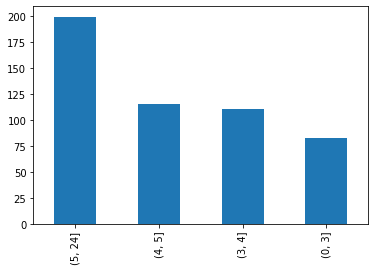

In [13]:
# Inspect the result
bins_rad.value_counts().plot(kind='bar')
plt.show()

In [14]:
# Replace the existing 'RAD' column
boston_features['RAD']=bins_rad

In [15]:
boston_df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [16]:
# First, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
# Use pd.cut()
bins_tax = pd.cut(boston_df['TAX'], bins)
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_tax = bins_tax.cat.as_ordered()
bins_tax.head()

0    (250, 300]
1      (0, 250]
2      (0, 250]
3      (0, 250]
4      (0, 250]
Name: TAX, dtype: category
Categories (5, interval[int64]): [(0, 250] < (250, 300] < (300, 360] < (360, 460] < (460, 712]]

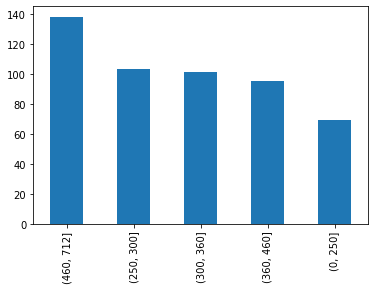

In [17]:
# Check if the result is balanced
bins_tax.value_counts().plot(kind='bar')
plt.show()

In [18]:
boston_features['TAX']=bins_tax

### Create dummy variables

In [19]:
# Create dummy variables for RAD and TAX
tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)

In [20]:
# Remove original RAD and TAX columns
boston_features = boston_features.drop(['RAD','TAX'], axis=1)

In [21]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [22]:
# Rebuilt DataFrame with dummy variables
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


## Investigating multicolinearity

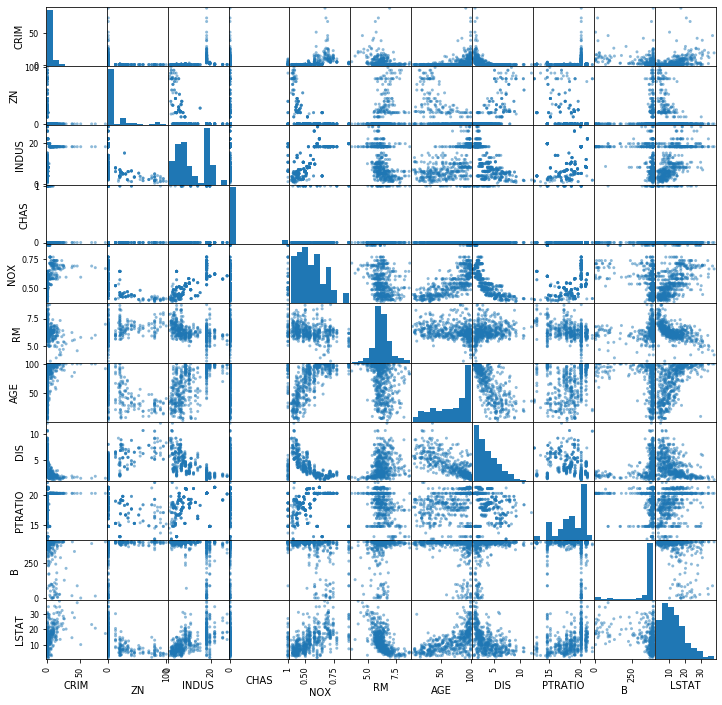

In [23]:
pd.plotting.scatter_matrix(boston_features.iloc[:, :11], figsize=[12, 12]);

In [24]:
boston_features.iloc[:, :11].corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.496996
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,-0.366087


In [25]:
abs(boston_features.iloc[:, :11].corr()) > 0.75


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
CRIM,True,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,False,True,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False
DIS,False,False,False,False,True,False,False,True,False,False,False
PTRATIO,False,False,False,False,False,False,False,False,True,False,False
B,False,False,False,False,False,False,False,False,False,True,False


In [26]:
# Remove NOX
boston_features = boston_features.drop('NOX', axis=1)

In [27]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


## Feature scaling

In [28]:
boston_cont = boston_features[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B','LSTAT']]
boston_cont.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


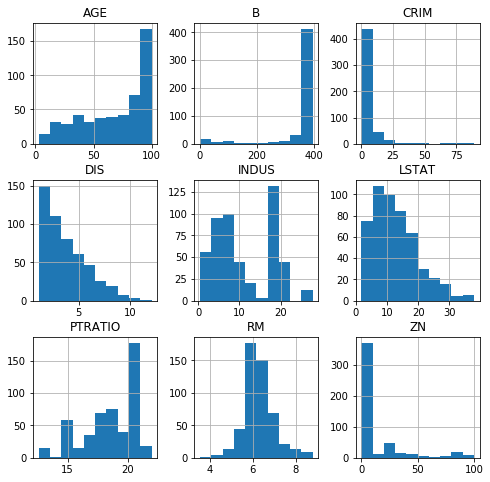

In [29]:
boston_cont.hist(figsize  = [8, 8]);

In [30]:
data_log = pd.DataFrame([])

cols = ['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'PTRATIO']

for col in cols:
    data_log[col] = np.log(boston_features[col])

data_log.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO
0,4.177459,5.983684,-5.064036,1.408545,0.837248,1.605430,2.727853
1,4.368181,5.983684,-3.600502,1.602836,1.955860,2.212660,2.879198
2,4.112512,5.973377,-3.601235,1.602836,1.955860,1.393766,2.879198
3,3.824284,5.977949,-3.430523,1.802073,0.779325,1.078410,2.928524
4,3.992681,5.983684,-2.672924,1.802073,0.779325,1.673351,2.928524


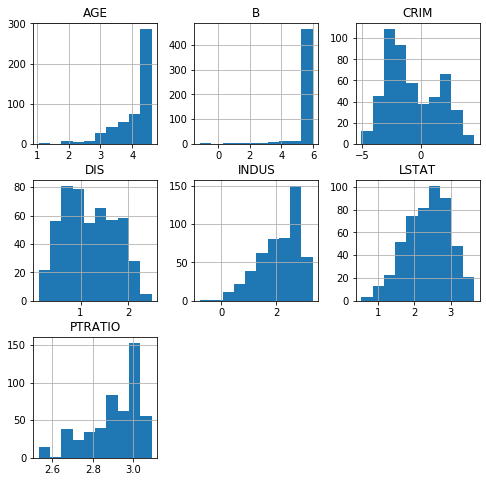

In [31]:
data_log.hist(figsize  = [8, 8])
plt.show()

In [32]:
# Investigate ZN

data_log['ZN'] = np.log(boston_cont['ZN'])
boston_cont['ZN'].describe()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [33]:
# Feature scaling

age = boston_cont['AGE']
b = boston_cont['B']
rm = boston_cont['RM']
logcrim = data_log['CRIM'] 
logdis = data_log['DIS']  
logindus = data_log['INDUS'] 
loglstat = data_log['LSTAT']
logptratio = data_log['PTRATIO']


#min-max scaling
boston_features['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS']   = (logdis-min(logdis))/(max(logdis) - min(logdis))

# no manipulation
boston_features['RM'] = boston_cont['RM']

# standardisation
boston_features['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
boston_features['AGE'] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features['PTRATIO'] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))


In [34]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.000000,18.0,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-0.247852,0,0,0,1,0,0,0
1,0.153211,0.0,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.051253,0,0,0,0,0,0,0
2,0.153134,0.0,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-0.316381,0,0,0,0,0,0,0
3,0.171005,0.0,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-0.418482,0,0,0,0,0,0,0
4,0.250315,0.0,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-0.225862,0,0,0,0,0,0,0


## Linear Regression Model

### Using statsmodels

In [35]:
X = boston_features
X.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.000000,18.0,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-0.247852,0,0,0,1,0,0,0
1,0.153211,0.0,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.051253,0,0,0,0,0,0,0
2,0.153134,0.0,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-0.316381,0,0,0,0,0,0,0
3,0.171005,0.0,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-0.418482,0,0,0,0,0,0,0
4,0.250315,0.0,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-0.225862,0,0,0,0,0,0,0


In [36]:
Y = boston_target
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [37]:
X_int = sm.add_constant(X)
model = sm.OLS(Y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 15 May 2020   Prob (F-statistic):          1.45e-149
Time:                        10:05:46   Log-Likelihood:                -1453.8
No. Observations:                 506   AIC:                             2944.
Df Residuals:                     488   BIC:                             3020.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4548      3.176      2.662      0.008       2.214      14.696
CRIM              -1.0178      2.318     -0.439      0.661      -5.573       3.537
ZN                -0.0108      0.013     -0.807      0.420      -0.037       0.016
INDUS             -1.1358      0.394     -2.882      0.004      -1.910      -0.361
CHAS               2.5880      0.794      3.260      0.001       1.028       4.148
RM                 2.7255      0.404      6.742      0.000       1.931       3.520
AGE                0.0570      0.358      0.159      0.874      -0.647       0.761
DIS              -10.5294      1.915     -5.499      0.000     -14.291      -6.767
PTRATIO           -1.7001      0.292     -5.831      0.000      -2.273      -1.127
B                  3.6846      0.987      3.733      0.000       1.745       5.624
LSTAT            -29.3020      1.828    -16.033      0.000     -32.893     -25.711
RAD_(3, 4]         1.4504      0.771      1.881      0.061      -0.065       2.966
RAD_(4, 5]         0.5448      0.763      0.714      0.475      -0.954       2.043
RAD_(5, 24]        1.9149      0.817      2.345      0.019       0.310       3.520
TAX_(250, 300]    -2.5406      0.730     -3.483      0.001      -3.974      -1.107
TAX_(300, 360]    -2.3320      0.808     -2.886      0.004      -3.919      -0.745
TAX_(360, 460]    -3.1564      0.850     -3.712      0.000      -4.827      -1.486
TAX_(460, 712]    -3.1111      1.243     -2.503      0.013      -5.553      -0.669
==============================================================================
Omnibus:                      111.004   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.671
Skew:                           0.923   Prob(JB):                    4.15e-100
Kurtosis:                       7.278   Cond. No.                         484.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using scikit-learn

In [38]:
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# coefficients
linreg.coef_

array([[-1.01784833e+00, -1.08057329e-02, -1.13580452e+00,
         2.58802767e+00,  2.72547627e+00,  5.69776457e-02,
        -1.05294486e+01, -1.70013933e+00,  3.68457801e+00,
        -2.93019827e+01,  1.45035793e+00,  5.44817201e-01,
         1.91486263e+00, -2.54062866e+00, -2.33201845e+00,
        -3.15635235e+00, -3.11113482e+00]])

In [40]:
# intercept
linreg.intercept_

array([8.45482866])

## Making predictions

In [41]:
# Create New DataFrame
#pred_new = [1.0, 0.15, 6.07, 1.0, 6.1, 33.2, 7.6, 17.0, 383.0, 10.87, 1, 1, 0]
#pred_df = pd.DataFrame([pred_new], columns=X_int.columns)

# Min-Max scaling
#pred_df['B'] = (pred_df['B']-b_min)/(b_max-b_min)
#pred_df['CRIM'] = (np.log(pred_df['CRIM'])-min(logcrim))/(max(logcrim)-min(logcrim))
#pred_df['DIS'] = (np.log(pred_df['DIS'])-min(logdis))/(max(logdis)-min(logdis))

# Standardization
#pred_df['AGE'] = (pred_df['AGE']-age_mean)/np.sqrt(age_var)
#pred_df['INDUS'] = (np.log(pred_df['INDUS'])-np.mean(logindus))/np.sqrt(np.var(logindus))
#pred_df['LSTAT'] = (np.log(pred_df['LSTAT'])-np.mean(loglstat))/np.sqrt(np.var(loglstat))
#pred_df['PTRATIO'] = (np.log(pred_df['PTRATIO'])-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

#prediction = model.predict(pred_df).iloc[0]
#prediction

## Feature selection

### Using stepwise selection

In [42]:
# Define X and y
X = boston_features
y = boston_target

In [43]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [44]:
stepwise_selection(X, y)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  LSTAT                          with p-value 9.27989e-122
Add  RM                             with p-value 1.98621e-16
Add  PTRATIO                        with p-value 2.5977e-12
Add  DIS                            with p-value 2.85496e-09
Add  B                              with p-value 2.77572e-06
Add  INDUS                          with p-value 0.0017767
Add  CHAS                           with p-value 0.0004737


['LSTAT', 'RM', 'PTRATIO', 'DIS', 'B', 'INDUS', 'CHAS']

In [45]:
# Updated features
X_updated = boston_features[['LSTAT', 'RM', 'PTRATIO', 'DIS', 'B', 'INDUS', 'CHAS']]

In [46]:
# Rebuild model in statsmodels

# Define X with intercept using add_constant
X_int = sm.add_constant(X_updated)

model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     242.7
Date:                Fri, 15 May 2020   Prob (F-statistic):          4.89e-156
Time:                        10:05:47   Log-Likelihood:                -1464.7
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     498   BIC:                             2979.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0123      2.829      1.772      0.077      -0.545      10.570
LSTAT        -29.0421      1.647    -17.629      0.000     -32.279     -25.805
RM             2.8712      0.388      7.405      0.000       2.109       3.633
PTRATIO       -1.3564      0.227     -5.983      0.000      -1.802      -0.911
DIS           -9.7229      1.326     -7.333      0.000     -12.328      -7.118
B              4.0619      0.934      4.347      0.000       2.226       5.898
INDUS         -1.2099      0.334     -3.619      0.000      -1.867      -0.553
CHAS           2.7988      0.795      3.519      0.000       1.236       4.362
==============================================================================
Omnibus:                      105.185   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.621
Skew:                           0.878   Prob(JB):                     1.03e-92
Kurtosis:                       7.124   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using recursive feature elimination

In [47]:
# Define X and y
X = boston_features
y = boston_target

In [48]:
# Choose 5 features to select
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)

In [49]:
selector = selector.fit(X, y['MEDV']) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False, False, False])

In [50]:
#Fit the linear regression model again using the 5 selected columns

selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# predict $\hat y$ using your model
yhat = linreg.predict(X[selected_columns])
yhat[:5]

array([[31.16165902],
       [23.76929453],
       [34.8764376 ],
       [36.98692436],
       [31.32930715]])

$SS_{residual} = \sum (y - \hat{y})^2 $

$SS_{total} = \sum (y - \bar{y})^2 $

$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$

$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$

In [52]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [53]:
r_squared

MEDV    0.742981
dtype: float64

In [54]:
adjusted_r_squared

MEDV    0.740411
dtype: float64

## Train-Test Split

In [55]:
# Start with 5 features chosen using recursive feature elimination 
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

In [56]:
X.head()

,CHAS,RM,DIS,B,LSTAT
0,0.0,6.575,0.542096,1.000000,-0.247852
1,0.0,6.421,0.623954,1.000000,-0.051253
2,0.0,7.185,0.623954,0.989737,-0.316381
3,0.0,6.998,0.707895,0.994276,-0.418482
4,0.0,7.147,0.707895,1.000000,-0.225862


In [57]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [59]:
# Fit model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [61]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate training and test MSE
MSE_train = mean_squared_error(y_train, y_hat_train)
MSE_test = mean_squared_error(y_test, y_hat_test)
print(f'MSE for training: {MSE_train}')
print(f'MSE for test: {MSE_test}')

MSE for training: 20.48344649651099
MSE for test: 26.9718202636169


## K-fold Cross Validation

In [62]:
# Join features and target
data = pd.concat([X, y], axis = 1)

In [63]:
data.head()

,CHAS,RM,DIS,B,LSTAT,target
0,0.0,6.575,0.542096,1.000000,-0.247852,24.0
1,0.0,6.421,0.623954,1.000000,-0.051253,21.6
2,0.0,7.185,0.623954,0.989737,-0.316381,34.7
3,0.0,6.998,0.707895,0.994276,-0.418482,33.4
4,0.0,7.147,0.707895,1.000000,-0.225862,36.2


In [64]:
# Define helpder function

def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [65]:
# Apply kfolds() to bos_data with 5 folds
bos_folds = kfolds(data, 5)

In [66]:
# Perform linear regression on each and calculate the training and test error:

test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(bos_folds) if i!=n])
    test = bos_folds[n]
    
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    
    # Evaluate Train and Test errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    MSE_train = mean_squared_error(y_train, y_hat_train)
    MSE_test = mean_squared_error(y_test, y_hat_test)
    
    train_errs.append(MSE_train)
    test_errs.append(MSE_test)

print(train_errs)
print(test_errs)

[20.649872189199815, 20.796147704901717, 22.13383216208596, 22.7888740689221, 21.93012767697514]
[27.448918384756006, 26.35487647276638, 27.40186435677303, 28.2642633863654, 27.644747745396515]


In [67]:
# Using scikit-learn

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_5_results

array([-13.40514492, -17.4440168 , -37.03271139, -58.27954385,
       -26.09798876])

## Interactions

We won't bother to preprocess the data in this section, just show effect of interactions

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [69]:
regression = LinearRegression()
boston = load_boston()

In [70]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['PRICE'])
all_data = pd.concat([X,y], axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.7190106820189477

### Find top pairwise interactions

In [72]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))
len(combinations)

78

In [73]:
combinations[0]

('CRIM', 'ZN')

In [74]:
## code to find top 3 interactions by R^2 value here

interactions = {}

for combo in combinations:
    X_interact = X.copy()
    var_1 = combo[0]
    var_2 = combo[1]
    X_interact['var1_inter_var2'] = X[var_1] * X[var_2]
    crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
    interact_r2 = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
    interactions[combo] = interact_r2

top_interactions = sorted(interactions.items(), key=lambda item: item[1], reverse = True)
top_interactions[:3]

[(('RM', 'LSTAT'), 0.7864889421124028),
 (('RM', 'TAX'), 0.7750525123747647),
 (('RM', 'RAD'), 0.7682152400234057)]

In [75]:
rm = np.asarray(X[['RM']]).reshape(len(X[['RM']]))

In [76]:
high_rm = all_data[rm > np.percentile(rm, 67)]
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[rm <= np.percentile(rm, 33)]

In [77]:
def build_interaction_rm(varname, description):
    
    # define LR
    regression_high = LinearRegression()
    regression_med = LinearRegression()
    regression_low = LinearRegression()
    
    var_1 = high_rm[varname].values.reshape(-1, 1)
    var_2 = med_rm[varname].values.reshape(-1, 1)
    var_3 = low_rm[varname].values.reshape(-1, 1)
    
    # fit model
    regression_high.fit(var_1, high_rm['PRICE'])
    regression_med.fit(var_2, med_rm['PRICE'])
    regression_low.fit(var_3, low_rm['PRICE'])
    
    # Make predictions
    pred_1 = regression_high.predict(var_1)
    pred_2 = regression_med.predict(var_2)
    pred_3 = regression_low.predict(var_3)

    # The coefficients
    print(regression_high.coef_)
    print(regression_med.coef_)
    print(regression_low.coef_)
    
    # Plot figure
    plt.figure(figsize=(10,6))

    plt.scatter(high_rm[varname], high_rm['PRICE'],  color='blue', alpha = 0.3, label = 'high room count')
    plt.scatter(med_rm[varname], med_rm['PRICE'],  color='red', alpha = 0.3, label = 'med room count')
    plt.scatter(low_rm[varname], low_rm['PRICE'],  color='green', alpha = 0.3, label = 'low room count')

    plt.plot(high_rm[varname], pred_1,  color='blue', linewidth=2)
    plt.plot(med_rm[varname], pred_2,  color='red', linewidth=2)
    plt.plot(low_rm[varname], pred_3,  color='green', linewidth=2)
    
    plt.ylabel('Price')
    plt.xlabel(description)
    plt.legend()
    plt.show()

[-1.46614438]
[-0.67588205]
[-0.51981339]


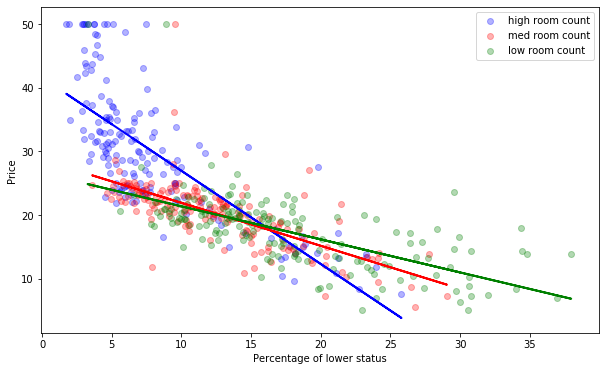

In [78]:
# first plot
build_interaction_rm('LSTAT', 'Percentage of lower status')

### Build model with interactions

In [79]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

X_interactions = X.copy()
X_interactions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
X_interactions['RM_LSTAT'] = X['RM'] * X['LSTAT']
X_interactions['RM_TAX'] = X['RM'] * X['TAX']
X_interactions['RM_RAD'] = X['RM'] * X['RAD']

In [81]:
X_interactions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LSTAT,RM_TAX,RM_RAD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,32.74350,1946.200,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,58.68794,1553.882,12.842
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,28.95555,1738.770,14.370
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,20.57412,1553.556,20.994
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,38.09351,1586.634,21.441


In [82]:
interactions_r2 = np.mean(cross_val_score(regression, X_interactions, y, scoring='r2', cv=crossvalidation))
interactions_r2

0.7852890964511973

In [83]:
# Investigate p_values in statsmodels

X_int = sm.add_constant(X_interactions)
model = sm.OLS(y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     134.3
Date:                Fri, 15 May 2020   Prob (F-statistic):          3.25e-167
Time:                        10:05:51   Log-Likelihood:                -1413.9
No. Observations:                 506   AIC:                             2862.
Df Residuals:                     489   BIC:                             2934.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8453      7.428     -1.998      0.046     -29.441      -0.250
CRIM          -0.1628      0.028     -5.756      0.000      -0.218      -0.107
ZN             0.0174      0.012      1.463      0.144      -0.006       0.041
INDUS          0.0900      0.053      1.707      0.088      -0.014       0.194
CHAS           2.5988      0.740      3.511      0.000       1.144       4.053
NOX          -13.4647      3.277     -4.109      0.000     -19.903      -7.026
RM            10.8250      0.986     10.976      0.000       8.887      12.763
AGE            0.0052      0.011      0.461      0.645      -0.017       0.028
DIS           -0.9547      0.175     -5.469      0.000      -1.298      -0.612
RAD            0.7093      0.476      1.489      0.137      -0.227       1.645
TAX            0.0333      0.025      1.354      0.176      -0.015       0.082
PTRATIO       -0.6849      0.113     -6.068      0.000      -0.907      -0.463
B              0.0048      0.002      2.068      0.039       0.000       0.009
LSTAT          1.1528      0.232      4.973      0.000       0.697       1.608
RM_LSTAT      -0.2916      0.041     -7.169      0.000      -0.372      -0.212
RM_TAX        -0.0072      0.004     -1.828      0.068      -0.015       0.001
RM_RAD        -0.0699      0.078     -0.896      0.371      -0.223       0.083
==============================================================================
Omnibus:                      255.231   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.486
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      13.307   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#Even though each individual interaction had a considerable effect
#on the $R^2$, but adding all three of them in our final model led to
#insignificant results for some of them. It might be worth checking 
#how the $R^2$ changes again when just including 2 interactions in 
#the final model.